In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import pickle
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as psb

import analysis_module as anlyz
from annual_projection_figures import annual_projections
from climatology_projection_figures import climatology_projections
from yoi_figure import yoi_figure, yoi_stats
from pentad_figures import pentad_figures
from first_month_figure import first_month_figure, first_month_stats
from peak_season_figure import peak_season_figure
from top10_percent_figure import top10_percent_figure
from clustering_figures import clustering_figures
from multistation_analysis_figures import multistation_annual_compare
from nodal_cycle_figure import nodal_cycle_figure, nodal_cycle_example

# path for manuscript figures and tables
maf = "/Users/Phil/Dropbox/Apps/Overleaf/2020_us_high_tide_flooding/figures_and_tables/"

# maf = "/Users/phil/Dropbox (Personal)/Presentations/2021/PICASC/figures/"

'''
The following loads a set of analyses generated by the script 
perform_analysis.py in this directory. The script calculates various 
statistical quantities from ensembles of monthly exceedance days projections 
for each NOS station.
''' 

slr_scenarios = ["int_low", "int", "int_high"]  # NOAA Intermediate SLR Scenario
thresholds = ["minor", "moderate"]
time_of_day = [0, 23]  # include all hours of the day

# load analysis for each station and threshold
stations, analysis = anlyz.load_analysis_results(
    slr_scenarios, thresholds, time_of_day
)

FileNotFoundError: [Errno 2] No such file or directory: './analysis_results_int_low_minor_h0023.pickle'

In [4]:
# analysis["Boston, MA"]["int"]["moderate"]["xdys_pent_mxmo_ptl"]

# sta = "Boston, MA"
sta = "Pago Pago, American Samoa "

slug = sta.lower()
slug = [s if s != " " else "_" for s in slug]
slug = [s for s in slug if s != ","]
slug = "".join(slug)

import os
d = "./results_by_station/" + slug
os.makedirs(d, exist_ok=True)

for scn in slr_scenarios:
    for thrsh in thresholds:
        for qnty in ["xdys_ann_ptl", "xdys_pent_mn_ptl", "xdys_pent_mxmo_ptl"]:
            p = analysis[sta][scn][thrsh][qnty]
            if qnty == "xdys_pent_mn_ptl":
                p = p.copy()/12
            fname = d + "/" + scn + "_" + thrsh + "_" + qnty + ".csv"
            with open(fname, "w") as f:
                p.astype(int).to_csv(f)


In [49]:
p = (analysis["Boston, MA"]["int"]["moderate"]["xdys_pent_mxmo_ptl"]).astype(int)

In [50]:
p

,5,10,17,50,83,90,95
year,,,,,,,
2010,2,2,2,3,5,5,6
2015,2,2,2,3,5,5,6
2020,2,2,2,3,5,6,6
2025,3,3,3,5,6,7,8
2030,4,5,5,7,9,10,11
2035,5,6,6,8,10,11,12
2040,6,7,7,9,12,13,14
2045,9,10,11,13,16,17,18
2050,13,13,14,17,19,20,21


In [18]:
exp = analysis["Boston, MA"]["int"]["moderate"]

In [19]:
exp.keys()

dict_keys(['station', 'xdys_mo_ptl', 'xdys_pent_top10pct_ptl', 'xdys_pent_mxmo_ptl', 'xdys_ann_mxssn_ptl', 'xdys_pent_mxssn_ptl', 'xdys_mxmo_ptl', 'prob_mxmo', 'prob_mxmo_frst_yr', 'prob_mxmo_frst_mo', 'xdys_ann_ptl', 'ratio_mx_ann_ptl', 'prob_ann', 'prob_ann_frst_yr', 'xdys_dec_md_ptl', 'xdys_dec_mn_ptl', 'xdys_dec_mx_ptl', 'xdys_pent_md_ptl', 'xdys_pent_mn_ptl', 'xdys_pent_mn_nomxssn_ptl', 'xdys_pent_mx_ptl', 'experiment'])

# Future high-tide flooding in the United States: Rapid transitions and temporal clustering

*Feedback welcome on the title. Definitely not set on this one.*

## Introduction

The following is a sketch of a paper on projected increases in U.S. high-tide flooding (HTF) in coming decades. The focus of this paper is not so much on the specific number of events at some point in the future, but rather how the transition to chronic high-tide flooding will occur. Specifically, I want to highlight the potential for abrupt increases in HTF frequency, as well as the potential for brief periods with extreme numbers to punctuate these transitions.

One reason for focusing on the transition rather than the absolute number is that if the complete range of possibilities for mean sea level (MSL) change is considered (e.g., the Kopp probabilistic MSL projection), uncertainty in the number of high-tide-flooding (HTF) days quickly becomes unwieldy. However, by focusing on transition periods for specific sea level rise scenarios, we can identify features of how the transition to chronic HTF will occur that are useful for establishing planning horizons and mitigating against a false sense of stability.

Here are the key points I hope to convey:

1. **The frequency of HTF in the U.S. will not increase smoothly into the future.** Projections of HTF days across the U.S. show pronounced inflections such that decades of little apparent change are often followed by rapid transitions where the expected frequency of HTF increases by 50–100 days per year over a single decade. The inflections may be useful to establish planning horizons and schedule investment in infrastructure.  

2. **HTF days tend to cluster together in time, leading to severe months and seasons during which the frequency of events will be many times greater than the expected annual rate of occurrence.** Coastal planners are accustomed to thinking about the impact of extreme rare events (e.g., 10, 50, or 100-year return levels), but it is also important to consider extreme months or seasons during which the *number* of threshold exceedances is anomalous rather than the magnitude of the events. The tendency for HTF days to cluster in time underscores the need for monthly to seasonal forecasts of mean sea level as an essential component of preparedness efforts.  

3. **Average daily maximum water level may reach HTF thresholds during extreme months 15–20 years before this frequency of exceedance becomes expected on an annual basis.** Planning horizons may need to be adjusted by decades to accommodate for the tendency for HTF days to cluster in time.  

## Methods

The methodology used here is an update to that of Thompson et al. (2019), which focused on projections of HTF in Honolulu. I have not yet written up the methods specifically for this analysis, but will work on that soon. 

The greatest methodological difference between this work and Thompson et al. (2019) is the switch to monthly resolution rather than annual, which allows for the climatology of HTF to be projected into the future, as well as the ability to assess extremes in monthly counts of HTF days.

A high-tide flooding (HTF) day is defined as a day during which at least one hour exceeds the threshold of interest. We focus here on the NOAA Minor and NOAA Moderate flooding thresholds.

The analysis focuses on NOS stations in the U.S. and its territories. A list of these stations can be found in a table at the end of this sketch in Appendix A.

In general, the projections of HTF days are probabilistic and result in an ensemble of monthly counts of HTF days over the 21st century for each station. Percentiles given for the various quantities in the analysis are calculated by repeating calculations over each member from these monthly ensembles.

## Figures

The rest of this document walks through the figures I have so far. The draft will build around these figures, which provide the key results of the analysis. Suggestions for additional figures or edits to the format or content of these figures are especially welcome.

**Note:** The figures that follow are interactive/zoomable. Click and drag to zoom; double click to reset the view. One reason for doing the figures this way is that I am eyeing a v2.0 of the HTF flooding tool developed previously for the NASA portal: https://sealevel.nasa.gov/flooding-days-projection/ (although it seems to be down at the moment; checking on that).

### Figure 1: Projected annual counts of HTF days from selected stations

The primary purpose of this figure is to introduce and demonstrate two concepts:

1. The existence of abrupt inflections in projections of HTF days.

2. Clustering of events via the 90th percentile curve, i.e., the "once per decade" curve. 

The figure below shows projected annual counts of HTF days from four locations selected from different regions around the US. The projections assume the NOAA Intermediate Sea Level Rise Scenario. The NOAA Minor flooding threshold is used for Honolulu, La Jolla, and St. Petersburg, while the NOAA Moderate flooding threshold is used for Boston. The blue shading gives the 10th to 90th percentile range from the projection ensemble for each station. This range should not be interpreted as an uncertainty, per se, because the dominant source of uncertainty in the projected counts (i.e., uncertainty in anthropogenic MSL rise) is excluded by choosing a discrete SLR scenario. Rather, the range between the percentiles demonstrates the degree to which the count in any given year can vary even if the amount of anthropogenic SLR is taken as a given. The range of possibilities reflects the role of stochastic variations in sea level across time scales and processes from year-to-year changes in storminess to the effect of decadal climate variability on mean sea level. The 90th percentile is highlighted in red, because the annual counts are expected to exceed this line once per decade on average given this particular SLR scenario.

The commonality between these projections is a pronounced inflection prior to the middle of the century. For each station, we identify a year of inflection (YOI) that marks an abrupt transition in the frequency of HTF days. The YOI was objectively identified in each case by considering two factors:

1. **The difference between the change in HTF frequency over two adjacent ten-year periods.** This is analogous to the second derivative of the curve and is illustrated in Figure 1 by the dashed black line (first 10-year period) and the solid black line (second 10-year period). This calculation highlights the absolute change in HTF days, but we also want to focus on inflections that correspond to a transition from few to many HTF days per year. For example, a change from 10 to 50 HTF days per year over a decade is likely to be a more relevant inflection from a planning perspective than a change from 50 to 100 HTF days per year despite the latter having a greater absolute difference. Thus, a secondary criterion is introduced ...  

2. **The 10-year multiplier (or x-fold increase) over the second of the two adjacent 10-year periods.** In the example above, the change from 10 to 50 would have a multiplier of 5; the change from 50 to 100 would have a multiplier of 2.

Both of the above quantities were computed for each year in the HTF projection curves, and the YOI for each station was chosen as the year with the highest average rank across both quantities. The YOI for each of the four stations in Figure 1 is depicted in the figure (open black circle). In each case, the YOI concludes a decade experiencing very little increase in the frequency of HTF days, which is followed by an abrupt increase in the frequency of HTF days over the following decade. The 10-year multiplier is >3 for all four stations (and much greater than 3 for Honolulu and St. Petersburg). Such transitions may catch communities off guard and underprepared if not identified in advance and communicated to decision makers.

The timing of the YOIs for all four stations are related to the 18.6-year nodal cycle. In the paper, I will spend some effort describing the regional variation in the nodal cycle and may add a figure in the next draft. Feedback from coauthors is welcome regarding whether a figure on the nodal cycle is necessary and what form it might take. Perhaps the most important regional difference to note is the tidal constituents in which the nodal cycle is expressed, which in turn determines the phasing of the nodal cycle in overall tidal amplitude. For Hawaiʻi, the US Pacific Coast, and the Gulf of Mexico, the nodal cycle is most prominently expressed in modulations of K1 (lunar diurnal) amplitude, which has amplitude minima in the mid 2030s, mid 2050s, and early 2070s. For northern portions of the US Atlantic coast, the nodal cycle is most prominent in modulations of M2 (lunar semidiurnal) amplitude, which has amplitude minima in the mid 2020s, mid 2040s, and early 2060s. Hence, Boston's YOI in Figure 1 occurs in the mid 2040s while YOIs for the other stations occur in the mid 2030s. The nodal cycle does not produce substantial modulations of tidal amplitude along southern portions of the US Atlantic coast.

In [11]:
# stations to include in the figure
subset = [
#     {"name": "Honolulu, HI", "threshold": "minor", "scenario": "int"},
# #     {"name": "Apra Harbor, Guam", "threshold": "minor", "scenario": "int"},
# #     {"name": "San Juan, PR", "threshold": "minor", "scenario": "int"},
#     {"name": "Boston, MA", "threshold": "moderate", "scenario": "int"},
# #     {"name": "Bar Harbor, ME", "threshold": "moderate", "scenario": "int"},
#     {"name": "La Jolla, CA", "threshold": "minor", "scenario": "int"},
# #     {"name": "Los Angeles, CA", "threshold": "minor", "scenario": "int"},
# #     {"name": "San Francisco, CA", "threshold": "minor", "scenario": "int"},
#     {"name": "St. Petersburg, FL", "threshold": "minor", "scenario": "int"},
# #     {"name": "Panama City Beach, FL", "threshold": "minor", "scenario": "int",

    {"name": "Honolulu, HI", "threshold": "minor", "scenario": "int"},
    {"name": "Apra Harbor, Guam", "threshold": "minor", "scenario": "int"},
    {"name": "Pago Pago, American Samoa ", "threshold": "minor", "scenario": "int"},
    {"name": "Kwajalein Island", "threshold": "minor", "scenario": "int"},

#     {"name": "Wilmington, NC", "threshold": "minor", "scenario": "int"},
#     {"name": "Virginia Key, FL", "threshold": "minor", "scenario": "int"}
#     {"name": "Vaca Key, FL", "threshold": "minor", "scenario": "int"},
#     {"name": "South Beach, OR", "threshold": "minor", "scenario": "int"},
#     {"name": "Charleston, SC", "threshold": "minor", "scenario": "int"},
]

# quantity of interest
quantity = "xdys_ann_ptl"  # percentiles of annual exceedance day counts

# range of years over which to search for YOIs:
yoi_srch_rng = [2010, 2100]

# horizontal axis limits of the plotted projections (years)
plot_yr_lims = [2020, 2055]

# plot projections
fig = annual_projections(
    analysis, subset, quantity, yoi_srch_rng, plot_yr_lims
)
fig.write_image(maf + "annual_projections_int.pdf", scale=2)

<div class="caption"><b>Figure 1:</b> Projections of annual counts of high-tide-flooding days for four US locations: 50th percentile from the ensemble (blue line) and 10th–90th percentile range (blue shading, 90th percentile highlighted in red). The year of inflection (YOI, open black circle) for each projection correspond to abrupt increases in the frequency of HTF days, which are highlighted by comparing projected increases over two adjacent 10-year periods (dashed and solid black lines). All four projections assume the NOAA Intermediate SLR scenario. The NOAA Minor flooding threshold is assumed for Honolulu, San Diego, and St. Petersburg. The NOAA Moderate flooding threshold is assumed for Boston.</div>

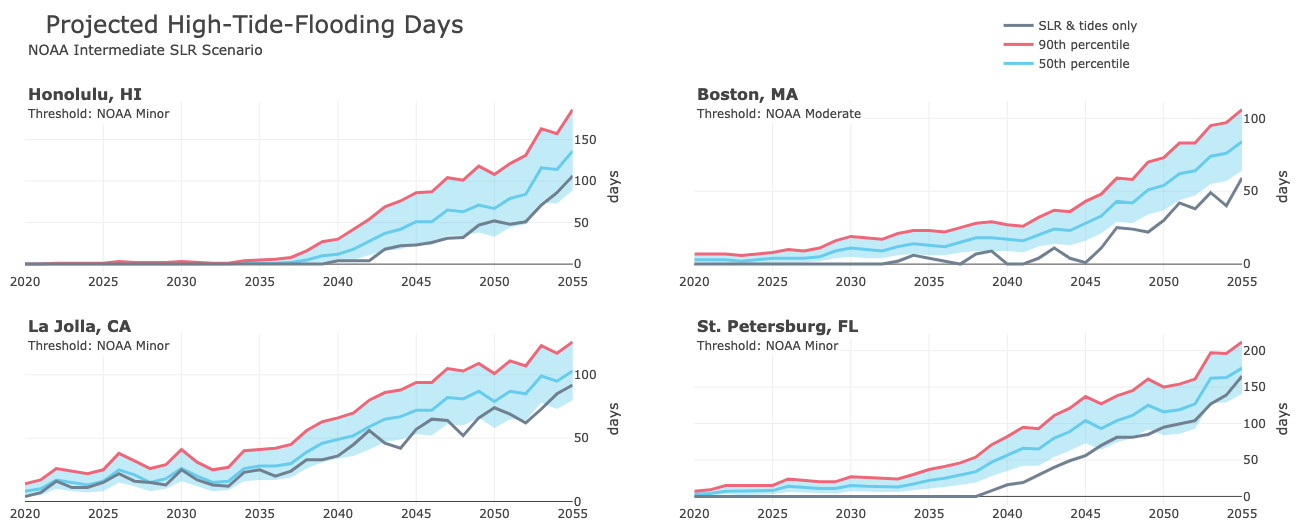

In [3]:
fig = annual_projections(
    analysis, subset, quantity, yoi_srch_rng, plot_yr_lims, show_tides_only=True
)
# fig.write_image(maf + "annual_projections_int_tides_only.pdf", scale=2)

### Figure 2: Nodal cycle amplitude

In [ ]:
noaa_prjn, ncyc_21, msl = nodal_cycle_example()

In [ ]:
combine_regions = {
    "Gulf of Mexico": ["Gulf of Mexico, West", "Gulf of Mexico, Florida",],
    "Atlantic Coast, North": [
        "Atlantic Coast, North 1",
        "Atlantic Coast, North 2",
    ],
}
fig, results, tot = nodal_cycle_figure(stations, combine_regions=combine_regions)
# fig.write_image(maf + "nodal_cycle_vs_slr.pdf", scale=2)

### Figure 2: Years of inflection for stations around the United States

The purpose of this figure is to:

1. Identify YOIs for locations across the US and its territories. 

2. Highlight regional differences in the timing and severity of abrupt changes in coming decades.

Figure 2 shows the YOI (calculated as described above in Figure 1) for each of the 89 NOS stations included in this analysis. The markers are colored by region. The calculation assumes the NOAA Intermediate SLR scenario. The upper panel shows YOIs for the NOAA Minor flooding threshold (typically about 50 cm above MHHW). The lower panel shows YOIs for the NOAA Moderate flooding threshold (typically about 80 cm above MHHW). The YOI for each station is represented by position along the horizontal axis.

The nature of the inflection is described in two ways (both using the 50th percentile of the HTF days projection):

1. The vertical axis shows the absolute 10-year increase in the number of HTF days/year following the YOI. 

2. The size of the marker shows the 10-year multiplier, i.e., the x-fold increase in HTF days/year over the 10-year period following the YOI.

The greatest impacts requiring the most rapid adjustments to infrastructure and mitigation strategies will tend to occur in locations where the 10-year period following the YOI experiences both large absolute and large relative changes in HTF days/year. In the figure, such locations can be identified as those with the largest circles that are also in the upper portion of the y-axis domain. 

Panama City Beach, FL is one such location. If the station experiences sea level rise equivalent to the NOAA Intermediate scenario, the location will experience a YOI in 2033, after which there will be an abrupt increase in exceedances above the NOAA Minor flooding threshold from 11 days/year on average to 91 days/year on average over a period of just 10 years. If not prepared for this inflection, the city will be left scrambling to keep up with the rapid changes in the frequency of these events. Thus, the YOI in 2033 represents an important planning horizon. For the NOAA Moderate flooding threshold, the relevant YOI for Panama City Beach is 2054, after which the station is expected to experience a 10-year increase in exceedances from 2 days/year to 40 days/year.

An important takeaway from these results is that decadal resolution in HTF projections is insufficient for decision making. Many locations will experience abrupt changes on subdecadal timescales that will be overlooked by decadal averages of HTF frequency. 

Here are some stats and notes to weave into the narrative (see Table 1 below). I probably went overboard here, and not all of this should be included, but perhaps coauthors can help filter the stats below to keep what is helpful/interesting.

* For the **NOAA Intermediate SLR scenario** and **NOAA Minor flooding threshold**: 

    * YOIs occur before 2040 in 82% of the stations. 

    * 64% of the stations will experience a 10-year increase greater than 50 HTF days/year following the YOI. 

        * 32% of the stations will experience a 10-year increase greater than 75 HTF days/year following the YOI. 
        
    * 39% of the stations will experience at least a quadrupling of HTF days/year over the decade following the YOI. 

    * 30% will experience both a 10-year increase greater than 50 HTF days/year and at least a quadrupling in HTF frequency. 

        * 20% (18 of 89 stations) will experience such an inflection prior to 2040. Eleven of these are in the Gulf of Mexico; four are in Hawaii. These are the regions than should expect to see drastic and abrupt changes in the freqency of Minor HTF days with planning horizons of less than two decades.  

    * The NOAA minor flooding threshold is already exceeded frequently for most stations in the Atlantic Coast, North region. As a result, the YOIs do not correspond to changes that are as drastic as in other regions. All but the three of the 28 stations in this region have YOIs before 2030 (due to nodal cycle minima in M2 amplitude in the mid 2020s), but 60% of the stations have 10-year multipliers less than three. The same is true for most stations in the Atlantic Coast, South region as well, with Vaca Key, FL, Virginia Key, FL, and Wilmington, NC being the exceptions. 
    
        * Note that the above does not mean that U.S. Atlantic coastlines are immune to impacts from minor high tide flooding. However, these results show that increases in the frequency of impacts will be more gradual and consistent in time compared to other regions. This is due in large part to two factors: (1) The largest multipliers tend to occur as a given threshold transitions from few to many exceedances, but Atlantic coasts have already begun this transition; and (2) the impact of the 18.6 nodal cycle on tidal amplitude are smaller along these coasts compared to the Pacific and Gulf of Mexico regions. 
    
    * In contrast to the Atlantic Coast, 69% of the 45 stations in the Pacific Islands, California, Gulf of Mexico, and Caribbean regions have 10-year multipliers greater than 4, and 38% have multipliers greater than 6. 

* For the **NOAA Intermediate SLR scenario** and **NOAA Moderate flooding threshold**: 

    * The timing of YOIs for the NOAA Moderate threshold shifts to later in the century with just 7% of stations experiencing an inflection prior to 2040, but 67% experiencing an inflection prior to 2060. 
    
    * In general, since the YOIs occur later in the century when rates of SLR are higher, the 10-year multipliers for decades following YOIs are substantially larger for the NOAA Moderate flooding threshold compared to the NOAA Minor threshold. 
        
        * 79% of stations will experience a 10-year multiplier greater than four for the moderate threshold, compared to 39% for the minor threshold. 
        
        * 35% will experience a multiplier greater than 6 for the moderate threshold, compared to 20% for the minor threshold. 
        
        * Inflections in the Atlantic Coast, North are notably larger for the moderate threshold with 68% of stations experiencing a 10-year multiplier greater than 4, compared with 0% of stations experiencing a multiplier that large for the minor threshold. 
    
    * For regions affected by the 18.6 year nodal cycle, the YOIs tend to cluster around minima in the tidal amplitude. For the minor flooding threshold, YOIs cluster in the mid 2030s for regions in which K1 amplitude is the dominant effect of the nodal cycle. For the moderate threshold, YOIs for theses regions cluster around the mid 2050s or early 2070s. 

* For the **NOAA Intermediate Low SLR Scenario** (figures in Appendix B): 

    * Abrupt transitions in minor HTF will still occur, but as one would expect, the magnitude of the transition is lessened, and the transitions tend to occur later in the century. 

    * 24% of stations will experience both a 10-year increase greater than 30 HTF days/year and at least a tripling by 2060. 

        * 7% will experience such an inflection prior to 2040.
        
**Note:** The figure below (and each following figure) is zoomable/interactive. You can hover over the markers to see which stations they represent. There are a lot of overlapping markers, but you can hide regions by clicking on the legend entries. You can isolate a region (i.e., hide all other regions) by double clicking on legend entries.


In [17]:
# combine some regions for the YOI analysis figure
combine_regions = {
    "Gulf of Mexico": ["Gulf of Mexico, West", "Gulf of Mexico, Florida",],
    "Atlantic Coast, North": [
        "Atlantic Coast, North 1",
        "Atlantic Coast, North 2",
    ],
}

# range of years over which to search for YOIs:
yoi_srch_rng = [2010, 2100]

# find yois
yoi = anlyz.yoi_analysis(
    analysis,
    stations,
    search_range=yoi_srch_rng,
    combine_regions=combine_regions,
)

In [18]:
# scenarios and thresholds
slr_scenarios = ["int", "int_low", "int_high"]
thresholds = ["minor", "moderate"]

# generate figures
for scn in slr_scenarios:
    for thrsh in thresholds:
        show_title = True if (thrsh == "minor") else False
        show_xlabel = (
            True  # if (scn == "int_low") & (thrsh == "moderate") else False
        )
        fig = yoi_figure(
            yoi,
            scn,
            thrsh,
            absolute_increase_cap=100,
            multiplier_cap=10,
            show_title=show_title,
            show_xlabel=show_xlabel,
        )
        fig.write_image(maf + "yoi_" + scn + "_" + thrsh + ".pdf", scale=2)

<div class="caption"><b>Figure 2:</b> Projected ten-year increases in annual counts of high-tide-flooding days following years of inflection (YOIs) for 89 US locations. The markers are colored by geographic region with size corresponding to ten-year multipliers following the YOIs. The calculations assume the NOAA Intermediate sea level rise scenario and correspond to the NOAA Minor flooding threshold (upper) and NOAA Moderate flodding threshold (lower).</div>

In [ ]:
yoi_midx = pd.MultiIndex.from_tuples(
    [
        ("Station Metadata", "Location", "NOAA ID"),
        ("Station Metadata", "Location", "Name"),
        ("Station Metadata", "Location", "Region"),
        ("Station Metadata", "Thresholds (cm)", "Minor"),
        ("Station Metadata", "Thresholds (cm)", "Moderate"),
        ("Intermediate SLR Scenario", "Minor", "YOI"),
        ("Intermediate SLR Scenario", "Minor", "10A"),
        ("Intermediate SLR Scenario", "Minor", "10M"),
        ("Intermediate SLR Scenario", "Moderate", "YOI"),
        ("Intermediate SLR Scenario", "Moderate", "10A"),
        ("Intermediate SLR Scenario", "Moderate", "10M"),
        ("Intermediate Low SLR Scenario", "Minor", "YOI"),
        ("Intermediate Low SLR Scenario", "Minor", "10A"),
        ("Intermediate Low SLR Scenario", "Minor", "10M"),
        ("Intermediate Low SLR Scenario", "Moderate", "YOI"),
        ("Intermediate Low SLR Scenario", "Moderate", "10A"),
        ("Intermediate Low SLR Scenario", "Moderate", "10M"),
        
    ]
)
yoi_table = pd.DataFrame(columns=yoi_midx)
yoi_table.loc[:, ("Station Metadata", "Location", "NOAA ID")] = stations["NOAA ID"]
yoi_table.loc[:, ("Station Metadata", "Location", "Name")] = stations.index
yoi_table.loc[:, ("Station Metadata", "Location", "Region")] = stations["Region"]
yoi_table.index = range(yoi_table.index.size)

yoi0 = yoi.replace(to_replace=[np.nan], value=[None])
yoi0.index = yoi0["NOAA ID"]
yoi0 = yoi0.loc[stations["NOAA ID"]]

z = (yoi0.Scenario == "int") & (yoi0.Threshold == "minor")
yoi_table.loc[:, ("Intermediate SLR Scenario", "Minor", "YOI")] = yoi0.YOI.loc[z].astype(int).values
yoi_table.loc[:, ("Intermediate SLR Scenario", "Minor", "10A")] = yoi0["10-year increase"].loc[z].astype(int).values
yoi_table.loc[:, ("Intermediate SLR Scenario", "Minor", "10M")] = yoi0["10-year multiplier"].loc[z].values

z = (yoi0.Scenario == "int") & (yoi0.Threshold == "moderate")              
yoi_table.loc[:, ("Intermediate SLR Scenario", "Moderate", "YOI")] = yoi0.YOI.loc[z].astype(int).values
yoi_table.loc[:, ("Intermediate SLR Scenario", "Moderate", "10A")] = yoi0["10-year increase"].loc[z].astype(int).values
yoi_table.loc[:, ("Intermediate SLR Scenario", "Moderate", "10M")] = yoi0["10-year multiplier"].loc[z].values

z = (yoi0.Scenario == "int_low") & (yoi0.Threshold == "minor")
yoi_table.loc[:, ("Intermediate Low SLR Scenario", "Minor", "YOI")] = yoi0.YOI.loc[z].astype(int).values
yoi_table.loc[:, ("Intermediate Low SLR Scenario", "Minor", "10A")] = yoi0["10-year increase"].loc[z].astype(int).values
yoi_table.loc[:, ("Intermediate Low SLR Scenario", "Minor", "10M")] = yoi0["10-year multiplier"].loc[z].values

z = (yoi0.Scenario == "int_low") & (yoi0.Threshold == "moderate")
yoi_table.loc[:, ("Intermediate Low SLR Scenario", "Moderate", "YOI")] = [str(int(v)) if v is not None else "-" for v in yoi0.YOI.loc[z].values]
yoi_table.loc[:, ("Intermediate Low SLR Scenario", "Moderate", "10A")] = [str(int(v)) if v is not None else "-" for v in yoi0["10-year increase"].loc[z].values]
yoi_table.loc[:, ("Intermediate Low SLR Scenario", "Moderate", "10M")] = [str(v) if v is not None else "-" for v in yoi0["10-year multiplier"].loc[z].values]

yoi_table.index += 1

for k, rw in yoi_table.iterrows():
    
    sta_path = "../Output/json/" + str(rw.loc[("Station Metadata", "Location", "NOAA ID")]) + "/"
    fname = sta_path + "noaa_thresholds.json"
    with open(fname, "r") as f:
        dthrsh = json.load(f)
        
    yoi_table.loc[k, ("Station Metadata", "Thresholds (cm)", "Minor")] = int(dthrsh["minor"])
    yoi_table.loc[k, ("Station Metadata", "Thresholds (cm)", "Moderate")] = int(dthrsh["moderate"])
    
yoi_table.style.set_properties(
    **{"line-height": "1em"}
)
# with open(maf + "yoi_table.tex", "w") as f:
#     yoi_table.astype(str).to_latex(f, longtable=True)

In [ ]:
# scenarios and thresholds
slr_scenarios = ["int", "int_low"]
thresholds = ["minor", "moderate"]
# region = None
region = ["Gulf of Mexico"]
# region = ["Atlantic Coast, North"]#, "Atlantic Coast, South"]
# region = ["Pacific Islands", "California", "Gulf of Mexico"]
# region = ["Pacific Islands", "California", "Gulf of Mexico"]


# generate stats table
yoi_table = []
for scn in slr_scenarios:
    for thrsh in thresholds:
        stats, soi = yoi_stats(yoi, scn, thrsh, region)
        yoi_table.append(stats)
        if (scn == "int") & (thrsh == "minor"):
            stn_of_interest = soi
yoi_table = pd.concat(yoi_table, axis=1)

# pd.set_option("max_colwidth", 30)
# yoi_table.style.format.background_gradient(cmap='Blues')
yoi_table.style.set_properties(
    **{"line-height": "1em"}
).set_properties(
    subset=["Intermediate", "Intermediate Low"],
    **{"width": "100px"}
)
# with open(maf + "yoi_table.tex", "w") as f:
#     yoi_table.to_latex(f)
    

<div class="caption"><b>Table 1:</b> Aggregated percentages of stations meeting various criteria in year of inflection (YOI) calculations. Station counts (out of 89 total) are in parentheses.</div>

### Figure 3: Projections of HTF annual cycle

With Figure 3, we transition away from the "rapid transition" concept and focus on the tendency for HTF days to cluster together in time. 

The purpose of this figure is to:

1. Show examples of how the annual cycle of HTF days will change with sea level rise. <br>

2. Discuss how considering the annual cycle affects interpretations of annual counts of HTF days. <br>

3. Build toward discussing extreme _numbers_ of events during isolated extreme seasons or months. <br>

Figure 3 shows projected monthly counts of HTF days for the four stations previously discussed in Figure 1. For each station, the figure shows projected annual cycles for each station's YOI (blue) and ten years following the YOI (red). 

In each case, there are one or two seasons per year for which the number of HTF days increases more rapidly due to annual cycles in mean sea level and tidal amplitude. This has important implications for the temporal density of HTF days in coming decades and informs how we interpret annual counts of HTF days that are often given in reports and planning materials.  

In Honolulu, for example, the expected (i.e., 50th percentile) annual count of HTF days in 2047 is 63 (Figure 1). However, when we break that number down into monthly counts, we see that 30 of those events are expected to occur over a span of three months (October–December, Figure 2). Thus, the expected temporal density of HTF days during this season (10 days/month) is approximately double that expected from considering the annual count alone (about 5 days/month). Similar differences in seasonal density of HTF days are expected for the other three stations.

The seasonal clustering of events due to stationary annual cycles in mean sea level and tidal amplitude can be further compounded by stochastic variations in mean sea level and year-to-year (yet still predictable) variations in tidal amplitude. If, for example, a large monthly mean sea level anomaly occurs during the peak HTF season, the two factors compound and produce an extreme (in a statistical sense) number of HTF days that far exceeds what is expected (again in a statistical sense). We investigate the consequences of such extremes in counts of HTF days over seasonal or monthly periods in the following figures.

In [20]:
quantity = "xdys_mo_ptl"
fig = climatology_projections(analysis, subset, quantity, yoi_srch_rng, specific_years=[2020, 2035, 2050])
# fig.write_image(maf + "climatology_int.pdf", scale=2)

<div class="caption"><b>Figure 3:</b> Projected annual cycles in monthly counts of high-tide-flooding days for years of inflection (YOIs, blue) and 10 years later (red) for the four US locations in Figure 1. Shading shows the 10th–90th percentile intervals for each year and month.</div>

### Figures 4–6: Clustering of HTF days

The purpose of these figures is to:

1. Demonstrate the impact of clustering on the temporal density of HTF days. 

2. Discuss how clustering affects planning for the impacts of sea level rise.

Figure 4 shows the average number of HTF days per month in five-year periods for the same four US stations utilized above, again assuming the NOAA Intermediate SLR scenario. Using the ensemble of projections, we can also estimate the counts of HTF days during the most extreme season (i.e., consecutive three-month period) and most extreme individual month over each five-year span. The 50th percentile and 10th-90th percentile range are shown for each quantity. 

Focusing on the 2040–2044 pentad in Honolulu, the five-year period is projected to experience almost 150 Minor HTF days, corresponding to about 2.5 Minor HTF days per month on average. This frequency of flooding is not negligible, but it is also not likely to inspire significant investment in mitigation and adaptation. However, the 10th–90th percentile range for Minor HTF days during the most extreme season and month during this five-year span is 6–14 and 10–19 HTF days per month, respectively. Thus, the temporal density of HTF days during extreme seasons and months will be substantially greater than the average density during that period. Just as engineers and coastal planners are accustomed to planning for rare yet inevitable extreme events, adaptation and mitigation strategies should also include the inevitability of seasons or months with extreme *numbers* of HTF days. 

In [12]:
fig = pentad_figures(analysis, subset, [2030, 2050])
fig.write_image(maf + "pentads_int.pdf", scale=2)

<div class="caption"><b>Figure 4:</b> Projections of HTF days in 5-year periods for the four US stations in Figure 1 under the NOAA Intermediate SLR scenario: average number of HTF days per month in each 5-year period (blue), average number of HTF days per month during the 5-year peak season (yellow), and number of HTF days in the 5-year peak month (red). Circles represent the 50th percentile from the ensemble. Vertical lines show the 10th–90th percentile intervals.</div>

One way to illustrate the impact of clustering is to examine the percentage of the overall number of events that cluster together into a small number of high-density months. For Honolulu during the 2040-2044 period, we estimate that 35–50% of the Minor HTF days in Honolulu will occur in 10% of the months, leading to a temporal density during the top 10% of months (i.e., the most severe six months during the pentad) that is 5–10 times larger than during the remaining 90% of months. Similar clustering is expected for St. Petersburg, while the effect is smaller for Boston and La Jolla. 

Figure 5 shows the results of such calculations during 2040–2044 in aggregate across US stations. The total number of HTF days during the pentad are shown along the horizontal axis, while the percentage of those days in the most severe six months is shown along the vertical axis. Markers correspond to the 50th percentile of each quantity from the ensemble for each station–threshold combination; some stations are visible twice (e.g., Atlantic Coast, North stations) if substantial numbers of exceedances are expected for both the NOAA Minor and NOAA Moderate flooding thresholds (circles and diamonds, respectively) during the pentad. 

In this case, it is instructive to look beyond the specific percentages for each station to the general shape of the curve suggested by the points. As one would expect, small total numbers of HTF days are overwhelmingly clustered into a small number of months. For large total numbers of HTF days, the percentages asymptote at around twenty percent. Most interesting, however, is the central portion of the domain, where for around 100 total HTF days during a 5-year period at an arbitrary station, a good rule-of-thumb is that roughly 40–60% of those days can be expected to cluster into 10% of the months. The most common approach to projections of HTF, would be to provide the expected number of HTF days per year during this five-year period. For 100 total HTF days during a pentad, the value provided would be 20 days per year, corresponding to fewer than two days per month. This is a poor descriptor of what would actually occur, however, as the rule-of-thumb above suggests the top 10% of months will experience 7–10 days per month on average, while the remaining 90% of months will experience one or fewer on average. Similarly, an arbitrary station projected to experience 200 HTF days over a 5-year period (or about 3.5 days per month) can expect 30–50% of those days to cluster into 10% of the months. This corresponds to 10–17 HTF days per month on average during the six most severe months, while remaining months would experience fewer than 2.5 HTF days per month on average.

*I am interested to get the coauthors take on the implications of this clustering for mitigation strategies. The response could be quite different for short bursts of many HTF events as opposed to the slow drip suggested by projections with annual or decadal resolution. One thing I plan to emphasize here is that these results underscore the importance of monthly to seasonal forecasts of mean sea level in the future in order to identify severe months or seasons and advance to facilitate preparedness for brief bursts of HTF days.*

In [ ]:
# # perform peak season analysis and generate figure
# pks_df = anlyz.peak_season_analysis(
#     analysis, stations, combine_regions=combine_regions
# )
# thrsh_by_reg = {  # defaults to minor for regions not listed
#     "Atlantic Coast, North": "moderate",
#     "Gulf of Mexico": "moderate",
# }
# fig = peak_season_figure(
#     pks_df,
#     slr_scenario="int",
#     # threshold_by_region=thrsh_by_reg,
#     min_mod_switch=2,
# )
# # fig.write_image("./figures/peak_season_int.png", scale=2)

In [ ]:
# len("A dramatic increase in U.S. high-tide flooding frequency by 2045")
# len("Planning horizons and high-tide flooding in the United States")
# len(
#     "Regional planning horizons for high-tide flooding in the United States and its territories"
# )
# len(
#     "Rapid increases in high-tide flood frequency in the United States and its territories"
# )
# len(
#     "Abrupt increases in the frequency of high-tide flooding in the United States"
# )
# len("Future high-tide flooding in the United States: Rapid transitions and temporal clustering")

In [ ]:
# perform top 10% analysis and generate figure
t10_df = anlyz.top10_percent_analysis(
    analysis, stations, combine_regions=combine_regions
)
fig = top10_percent_figure(
    t10_df,
    slr_scenario="int",
    pentad_yr1=2040,
)
# fig.write_image(maf + "peak_season_int.pdf", scale=2)

<div class="caption"><b>Figure 5:</b> Effect of temporal clustering of HTF days during the 2040–2044 pentad. Total number of HTF days during the pentad (horizontal axis). Percentage of the total number of days concentrated in the most severe six months (vertical axis). Marker positions correspond to the 50th percentile of each quantity from the ensemble for each station–threshold combination. Marker types correspond to the NOAA Minor (circles) and NOAA Moderate (diamonds) flooding thresholds, respectively. Marker colors correspond to region.</div>

Another consequence of clustering is that any given frequency of HTF will occur during brief periods long before it becomes expected on an annual basis. For example, consider the HTF frequency of 15 days per month, which roughly corresponds to the average daily maximum water level—analogous to MHHW—reaching the HTF threshold. This frequency of exceedance above critical HTF thresholds is most commonly associated with the second half of the 21st century in most locations, but this perception is due to focusing on bulk assessments of average numbers of HTF days per year. Figure 6 demonstrates how clustering due to seasonal and stochastic factors shifts the perception of when this HTF frequency will occur. The "expected annually" values correspond to the year in which the 50th percentile of the Minor HTF projections for the NOAA Intermediate SLR scenario first reaches 15 days per month on average over an entire year. The "expected one month per year" values correspond to the year in which the 50th percentile of the projection first reaches 15 days for at least one month during the year. The bottom two rows leverage the probabilistic nature of the methodology and correspond to the 25th and 50th percentiles, respectively, for the year of the first month experiencing 15 Minor HTF days.  

Overall, results of these calculations show the years shifting toward present moving down the rows in the figure. For the NOAA Intermediate SLR scenario, we find that 89% of the stations analyzed have a 50% chance of experiencing the first individual month with 15 or more Minor HTF days prior to 2050; 57% have a 50% chance of experiencing such a month prior to 2040. Perhaps more importantly, by differencing the "expected annually" and "50% chance" years, we find that 42% of the stations are most likely to experience the first individual month with 15 or more Minor HTF days two decades or more prior to that HTF frequency being expected annually. Such a month is most likely to occur 15 or more years prior to being expected annually at 81% of stations. These results suggest that planning horizons based on frequency of HTF may need to be adjusted by decades toward the present in order to account for seasonal and stochastic factors. Such a shift is analogous to the difference in planning for a 20-year return period vs. a 1-year return period; the former will necessarily have a planning horizon far in advance of the latter.

In [ ]:
# perform first month analysis and generate figure
count = 15
fmo_df = anlyz.first_month_analysis(
    count, analysis, stations, combine_regions=combine_regions
)
fig = first_month_figure(
    fmo_df,
    slr_scenario="int",
    threshold="minor",  
    # min_mod_switch=["Expected monthly", 2030],
)
fig.write_image(maf + "first_month_int.pdf", scale=2)

<div class="caption"><b>Figure 6:</b> Years for which stations are expected to experience 15 or more Minor HTF flooding days per month over annual and monthly periods (top two rows) compared to probabilities for when such months will first occur (bottom two rows). Marker colors denote station region. The vertical position of each marker within the rows is an arbitrary vertical offset to allow visual distinction between regions and stations within each region.</div>

In [ ]:
fig = first_month_figure(
    fmo_df,
    slr_scenario="int_low",
    threshold="minor",  
    year_range=[2015, 2100],
)
fig.write_image(maf + "first_month_int_low.pdf", scale=2)

In [ ]:
# fmo_stats = first_month_stats(fmo_df, threshold="minor", year_diff=[15, 20, 25])
# fmo_stats

## Methods



## Appendix A: Station list

In [ ]:
pd.set_option("display.max_rows", None)
sta_list = stations.copy()
sta_list["Name"] = sta_list.index
sta_list.index = range(sta_list.shape[0])
sta_list = sta_list.loc[
    :, ["NOAA ID", "Name", "Latitude", "Longitude", "Region"]
]
sta_list

## Appendix B: Figures for NOAA Intermediate Low scenario

In [ ]:
# scenarios and thresholds
slr_scenarios = ["int_low"]
thresholds = ["minor", "moderate"]

# generate figures
for scn in slr_scenarios:
    for thrsh in thresholds:
        show_title = True if thrsh == "minor" else False
        show_xlabel = (
            True  # if (scn == "int_low") & (thrsh == "moderate") else False
        )
        fig = yoi_figure(
            yoi,
            scn,
            thrsh,
            absolute_increase_cap=100,
            multiplier_cap=10,
            show_title=show_title,
            show_xlabel=show_xlabel,
        )
#         fig.write_image("./figures/yoi_" + scn + "_" + thrsh + ".pdf", scale=2)
        yoi_stats(yoi, scn, thrsh)

<div class="caption"><b>Figure 2IL:</b> Projected ten-year increases in annual counts of high-tide-flooding days following years of inflection (YOIs) for 89 US locations. The markers are colored by geographic region with size corresponding to ten-year multipliers following the YOIs. The calculations assume the NOAA Intermediate Low sea level rise scenario and correspond to the NOAA Minor flooding threshold (upper) and NOAA Moderate flodding threshold (lower).</div>

In [ ]:
# perform first month analysis and generate figure
count = 15
fig = first_month_figure(
    fmo_df, slr_scenario="int_low", min_mod_switch=["Expected monthly", 2030], year_range=[2015, 2100]
)
# fig.write_image("./figures/first_month_int.png", scale=2)

<div class="caption"><b>Figure 6IL:</b> Years for which stations are expected to experience 15 or more Minor HTF flooding days per month over annual and monthly periods (top two rows) compared to probabilities for when such months will first occur (bottom two rows). Marker colors denote station region. The vertical position of each marker within the rows is an arbitrary vertical offset to allow visual distinction between regions and stations within each region.</div>

In [ ]:
with open("./GMSL_TPJAOS_4.2_19909_202002.txt", "r") as f:
    gmsl = pd.read_table(f, sep="\s+", skiprows=50, header=None)
gmsl.loc[:, 5:] /= 10 # cm
gmsl = gmsl.loc[gmsl.loc[:, 2] < 2020]
z = (gmsl.loc[:, 2] > 2000) & (gmsl.loc[:, 2] <= 2019)
gmsl.loc[:, [5, 7, 8, 10, 11]] -= gmsl.loc[z, [5, 7, 8, 10, 11]].mean(axis=0)

with open("../../../Data/Projections/NOAA_scenarios/NOAA_SLR_scenarios.pickle", "rb") as f:
    noaa_scn = pickle.load(f)
    
fig = go.Figure()

fig.add_trace(go.Scatter(x=gmsl.loc[:, 2], y=gmsl.loc[:, 11], mode="lines"))
for s in ["int_low", "int", "int_high"]:
    prjn = noaa_scn["proj"].loc[:, 0].loc[:, (s, 50)]
    prjn = prjn.loc[prjn.index <= 2040]
#     prjn -= prjn.loc[2010]
    fig.add_trace(go.Scatter(x=prjn.index, y=prjn.values))
    
fig.show()

In [ ]:
# len("A dramatic increase in U.S. high-tide flooding frequency by 2045")
# len("Planning horizons and high-tide flooding in the United States")
# len(
#     "Regional planning horizons for high-tide flooding in the United States and its territories"
# )
# len(
#     "Rapid increases in high-tide flood frequency in the United States and its territories"
# )
# len(
#     "Abrupt increases in the frequency of high-tide flooding in the United States"
# )
# len("Future high-tide flooding in the United States: Rapid transitions and temporal clustering")

In [ ]:
!jupyter nbconvert us_high_tide_flood_projections.ipynb --no-input --no-prompt --template=web_notebook.tpl --log-level WARN

In [ ]:
# check draft version!
!scp ./us_high_tide_flood_projections.html uhslc@wyrtki.soest.hawaii.edu:htdocs/uhslc.soest.hawaii.edu/foo/notebooks/us_high_tide_flooding/draft_v0.html